<>:15: SyntaxWarning: invalid escape sequence '\$'
<>:15: SyntaxWarning: invalid escape sequence '\$'
C:\Users\Tanvi\AppData\Local\Temp\ipykernel_125624\468108832.py:15: SyntaxWarning: invalid escape sequence '\$'
  data[col] = data[col].replace({'\$': '', ',': ''}, regex=True).astype(float)
C:\Users\Tanvi\AppData\Local\Temp\ipykernel_125624\468108832.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cleaned['Anomaly'] = model.fit_predict(X)


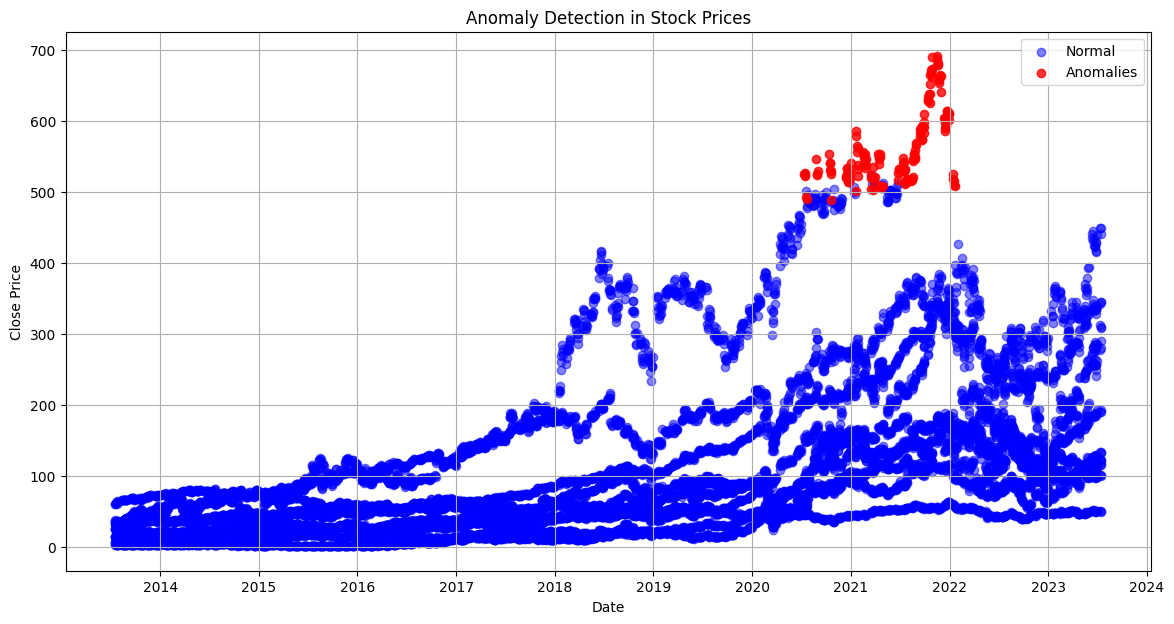

In [2]:
# Import necessary libraries
import pandas as pd
from sklearn.ensemble import IsolationForest
import matplotlib.pyplot as plt
import numpy as np

# Load the dataset
file_path = "C:\\Anomaly detection Project\\dataset\\data.csv" # Update this to your actual file path
data = pd.read_csv(file_path)

# Clean the data
# Remove the dollar signs and convert prices to numeric types
price_columns = ['Close/Last', 'Open', 'High', 'Low']
for col in price_columns:
    data[col] = data[col].replace({'\$': '', ',': ''}, regex=True).astype(float)

# Convert Date to datetime format
data['Date'] = pd.to_datetime(data['Date'], errors='coerce')

# Drop rows with any NaN values (if any)
data_cleaned = data.dropna()

# Select numeric features for anomaly detection
features = ['Close/Last', 'Volume', 'Open', 'High', 'Low']
X = data_cleaned[features]

# Initialize the Isolation Forest model
model = IsolationForest(n_estimators=100, contamination=0.01, random_state=42)
data_cleaned['Anomaly'] = model.fit_predict(X)

# Mark anomalies (Anomaly = -1 indicates an outlier)
anomalies = data_cleaned[data_cleaned['Anomaly'] == -1]

# Save the anomalies to a CSV file
anomalies.to_csv('anomalies.csv', index=False)

# Visualization of anomalies
plt.figure(figsize=(14, 7))

# Plot normal points
normal = data_cleaned[data_cleaned['Anomaly'] == 1]
plt.scatter(normal['Date'], normal['Close/Last'], label='Normal', color='blue', alpha=0.5)

# Plot anomalies
plt.scatter(anomalies['Date'], anomalies['Close/Last'], label='Anomalies', color='red', alpha=0.8)

# Add titles and labels
plt.title('Anomaly Detection in Stock Prices')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.grid()
plt.show()
